# <center>Decentralized Markets and the Emergence of Housing Wealth Inequality</center>
## <center>Example Script</center>

### <center> Omar A. Guerrero<center>
<center>The Alan Turing Institute & University College London, Department of Economics</center>
<br/><br/>

   
This is an example of how to use the `model.py` script in order to run the model and emerge housing wealth inequality from bottom-up. The result are plots similar to the ones presented in Figure 4 of the paper.
    

In [21]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from model import *

### Load parameters

In [22]:
dfp = pd.read_csv('params_theo.csv')
dfp = pd.DataFrame([dfp.value.values.tolist()], columns=dfp.name.values)

N = 2000 # the original parameterization considers 10,000 agents. Here we use less in order to get the results faster
alpha = dfp.alpha.values[0] # preference parameter
beta = dfp.beta.values[0] # preference parameter
B = dfp.B.values[0] # non-labor income
w = dfp.w.values[0] # wage
delta = dfp.delta.values[0] # survival probability
gamma = dfp.gamma.values[0] # discount factor
tau = dfp.tau.values[0] # labor income tax (complement)
z = dfp.z.values[0] # non-labor income tax (cmoplement)
s = dfp.s.values[0] # transfers
h = dfp.h.values[0] # asset sales tax
maxIter = int(dfp.maxIter.values[0])
A = dfp.A.values[0]

### Instantiate agent population

In [23]:
agents = [Agent(delta, w, gamma, A, alpha, beta, tau, z, B, s) for a in range(N)]

### Run the model and save the outputs

In [24]:
ts_gini, ts_cases, ts_p, ts_q, ts_p_std, ts_q_std = model_purchase(agents, maxIter=maxIter)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149  


### Plots

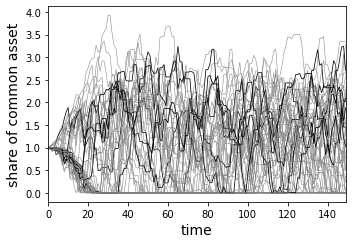

In [25]:
# Plot individual trajectories of housing ownership
plt.figure(figsize=(5,3.5))
history = np.array([agent.tsA for agent in agents])
avers = np.mean(history, axis=1)
for agent in agents[50:100]:
    if np.mean(agent.tsA) > np.percentile(avers, 90):
        plt.plot(agent.tsA, linewidth=.75, color='black')
    if np.mean(agent.tsA) <= np.percentile(avers, 90):
        plt.plot(agent.tsA, linewidth=.5, color='grey')
plt.xlim(0, maxIter-1)
plt.xlabel('time', fontsize=14)
plt.ylabel('share of common asset', fontsize=14)
plt.tight_layout()
plt.show()

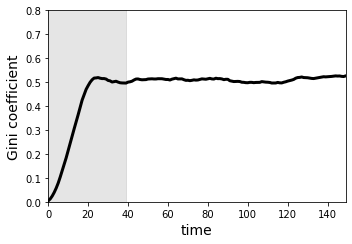

In [26]:
# Plot aggregate dynamics of the Gini coefficient
plt.figure(figsize=(5,3.5))
plt.fill_between(range(40), 0, 1, color='grey', alpha=.2)
plt.plot(ts_gini, linewidth=3, color='k')
plt.xlim(0, maxIter-1)
plt.ylim(0, .8)
plt.xlabel('time', fontsize=14)
plt.ylabel('Gini coefficient', fontsize=14)
plt.tight_layout()
plt.show()

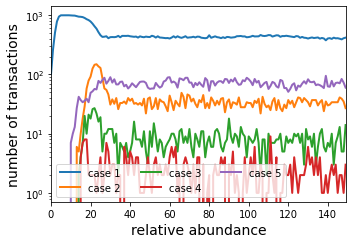

In [27]:
# Plot the composition of transaction cases
plt.figure(figsize=(5,3.5))
for case in range(1,6):
    plt.semilogy(ts_cases[case], linewidth=2)
plt.legend(['case 1', 'case 2', 'case 3', 'case 4', 'case 5'], ncol=3)
plt.xlabel('relative abundance', fontsize=14)
plt.ylabel('number of transactions', fontsize=14)
plt.xlim(0, maxIter-1)
plt.tight_layout()
plt.show()